# DTMF Code Recoginition

A simple SageMath notebook showing how to use the Discrete Fast Fourier Transformation (or rather a custom implementation of the STFT) to identify a sequence of numbers typed over a telephone call (12337 in this example).

This is just a PoC, so the code is really messy.

In [1]:
from scipy.io.wavfile import read as wav_read
from numpy.fft import rfft, irfft
from scipy.signal import find_peaks_cwt
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from IPython.display import Image


from sage.plot.point import Point
import time

In [2]:
sounds = wav_read("/Users/valentin/Desktop/fourier/dtmf/dtmf.wav")

samplerate 44100, using 0.1s chunks, 4410 samples per dfft


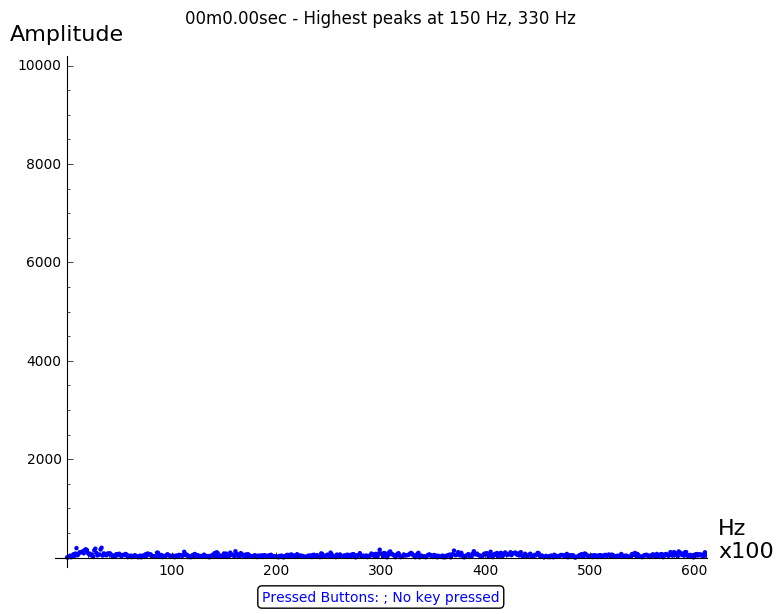

In [3]:
def get_tone_for_freq(a, b):
    if np.isclose(a, 69, atol=4):
        if np.isclose(b, 120, atol=4):
            return 1
    if np.isclose(a, 69, atol=3):
        if np.isclose(b, 133, atol=4):
            return 2
    if np.isclose(a, 69, atol=3):
        if np.isclose(b, 147, atol=4):
            return 3
    if np.isclose(a, 77, atol=3):
        if np.isclose(b, 120, atol=4):
            return 4
    if np.isclose(a, 77, atol=3):
        if np.isclose(b, 133, atol=4):
            return 5
    if np.isclose(a, 77, atol=3):
        if np.isclose(b, 147, atol=4):
            return 6
    if np.isclose(a, 85, atol=4):
        if np.isclose(b, 120, atol=4):
            return 7
    if np.isclose(a, 85, atol=4):
        if np.isclose(b, 133, atol=4):
            return 8        
    if np.isclose(a, 85, atol=4):
        if np.isclose(b, 147, atol=4):
            return 9
    if np.isclose(a, 94, atol=4):
        if np.isclose(b, 133, atol=4):
            return 0

samples_per_step = sounds[0]/10
samples_per_sec = sounds[0]
total_steps = len(sounds[1])/samples_per_step
print("samplerate %d, using 0.1s chunks, %d samples per dfft" % (samples_per_sec, samples_per_step))
cnt = 0
plots=[]


number = ""
last_was_no_number = True
while cnt < total_steps:
    window = sounds[1][cnt*samples_per_step:cnt*samples_per_step+samples_per_step]
    fft = abs(rfft([e[0] for e in window]))
    peaks = find_peaks_cwt(fft, np.arange(5,10))

    gen_title = ("00m%.2fsec - Highest peaks at %d Hz, %d Hz" % (cnt*samples_per_step/sounds[0], peaks[0]*10, peaks[1]*10))
    
    dtmf_tone = get_tone_for_freq(peaks[0], peaks[1])
    marked = None
    if dtmf_tone:
        detected_sound = "#%d pressed!" % dtmf_tone
        marked = list_plot(Point([peaks[0], peaks[1]],[0, 0],{'alpha':.5}), color="red", size=100)
        if last_was_no_number:
            number += str(dtmf_tone)
            last_was_no_number = False
    else:
        detected_sound = "No key pressed"
        last_was_no_number = True
        marked = line([(0,0), (0,0)])
        
    detected_sound = "Pressed Buttons: " + number + "; " + detected_sound

    marked +=(list_plot(fft, title=gen_title, xmax=600, xmin=0, ymin=0, ymax=10000, axes_labels=["Hz\nx100", "Amplitude"]) +
             text(detected_sound, (300,-800), bounding_box={'boxstyle':'round', 'fc':'w'}))
    
    plots.append(marked)
    cnt += 1
a = animate(plots)
f = a.gif(savefile='1.gif', delay=10)
# Does not work on github, but should be used for development because otherwise the image isn't reloaded
#html('<img src="1.gif?update=%d" />' % time.time())
with open('./1.gif','rb') as f:
    display(Image(data=f.read(), format='png'))

_Note: The red dots on the x-axis each represent one of the two frequencies which, in combination, represent one of the digits on a telephone keyboard._